In [858]:
#connexion à goodledrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [859]:
#import des librairies
import pandas as pd
import numpy as np

Lecture du Dataframe tags

In [860]:
#liste des noms des colonnes
cols = ["Timestamp", "EPC", "TID", "Antenna", "RSSI", "Frequency", "Hostname", "PhaseAngle", "DopplerFrequency"]

#notre dataframe
tags = pd.read_csv('/content/drive/MyDrive/ESEO_S7_S8/RFID_7_juin/lesCsv/xmoving.csv',sep=';',names=cols , skiprows = 3)


In [861]:
#afficher notre dataframe tags
tags  

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency
0,2023-03-30T12:01:17.8125670+02:00,AD3830770CCDD0AD3830042E,NaN,1,"-69,5","865,7",169.254.1.1,NaN,NaN
1,2023-03-30T12:01:17.8159520+02:00,AD3830770CCDD0AD3830040B,NaN,1,"-70,5","865,7",169.254.1.1,NaN,NaN
2,2023-03-30T12:01:17.8219270+02:00,000000000000000030613829,NaN,1,"-62,5","865,7",169.254.1.1,NaN,NaN
3,2023-03-30T12:01:17.8253450+02:00,AD3830770CCDD0AD383001C4,NaN,1,-74,"865,7",169.254.1.1,NaN,NaN
4,2023-03-30T12:01:17.8287300+02:00,AD3830770CCDD0AD383003B3,NaN,1,"-70,5","865,7",169.254.1.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1078,2023-03-30T12:01:31.4829160+02:00,AD3830770CCDD0AD383001C4,NaN,1,-76,"865,7",169.254.1.1,NaN,NaN
1079,2023-03-30T12:01:31.4985880+02:00,E280689400004000FE824919,NaN,2,-69,"865,7",169.254.1.1,NaN,NaN
1080,2023-03-30T12:01:31.5041430+02:00,AD3830770CCDD0AD3830031B,NaN,2,-70,"865,7",169.254.1.1,NaN,NaN
1081,2023-03-30T12:01:31.5182400+02:00,AD3830770CCDD0AD38300326,NaN,2,-75,"865,7",169.254.1.1,NaN,NaN


In [862]:
#Dimensions de notre Dataframe au départ: #1083 lignes et 9 colonnes
tags.shape

(1083, 9)

Formating

In [863]:
##Formating: #Sélection des colonnes souhaitées dans le dataframe
tags = tags[["EPC", "Timestamp", "Antenna", "RSSI"]]
tags.head()

,EPC,Timestamp,Antenna,RSSI
0,AD3830770CCDD0AD3830042E,2023-03-30T12:01:17.8125670+02:00,1,"-69,5"
1,AD3830770CCDD0AD3830040B,2023-03-30T12:01:17.8159520+02:00,1,"-70,5"
2,000000000000000030613829,2023-03-30T12:01:17.8219270+02:00,1,"-62,5"
3,AD3830770CCDD0AD383001C4,2023-03-30T12:01:17.8253450+02:00,1,-74
4,AD3830770CCDD0AD383003B3,2023-03-30T12:01:17.8287300+02:00,1,"-70,5"


In [864]:
##Formating: # Remplacement des virgules par des points dans la colonne 'RSSI' et conversion en float
tags['RSSI'] = tags['RSSI'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x).astype(float)
##Formating: # Copie de la colonne 'RSSI' dans une nouvelle colonne 'RSSIdbm'
tags["RSSIdbm"] = tags["RSSI"]

##Formating: # Calcul de la valeur en dBm à partir de la colonne 'RSSIdbm' en utilisant la formule de conversion
tags["RSSI"] = 10**(tags["RSSIdbm"]/10) * 10**6

##Formating: # Conversion de la colonne 'Timestamp' en format de date et heure
tags["Timestamp"] = pd.to_datetime(tags['Timestamp'])

<ipython-input-864-9fd39351c48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags['RSSI'] = tags['RSSI'].apply(lambda x: str(x).replace(",", ".") if isinstance(x, str) else x).astype(float)
<ipython-input-864-9fd39351c48e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags["RSSIdbm"] = tags["RSSI"]
<ipython-input-864-9fd39351c48e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [865]:
tags

,EPC,Timestamp,Antenna,RSSI,RSSIdbm
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5
1,AD3830770CCDD0AD3830040B,2023-03-30 12:01:17.815952+02:00,1,0.089125,-70.5
2,000000000000000030613829,2023-03-30 12:01:17.821927+02:00,1,0.562341,-62.5
3,AD3830770CCDD0AD383001C4,2023-03-30 12:01:17.825345+02:00,1,0.039811,-74.0
4,AD3830770CCDD0AD383003B3,2023-03-30 12:01:17.828730+02:00,1,0.089125,-70.5
...,...,...,...,...,...
1078,AD3830770CCDD0AD383001C4,2023-03-30 12:01:31.482916+02:00,1,0.025119,-76.0
1079,E280689400004000FE824919,2023-03-30 12:01:31.498588+02:00,2,0.125893,-69.0
1080,AD3830770CCDD0AD3830031B,2023-03-30 12:01:31.504143+02:00,2,0.100000,-70.0
1081,AD3830770CCDD0AD38300326,2023-03-30 12:01:31.518240+02:00,2,0.031623,-75.0


Nouvelles dimensions du dataframe

In [866]:
tags.shape

(1083, 5)

les tags movings

In [867]:
moving = pd.read_csv('/content/drive/MyDrive/ESEO_S7_S8/RFID_7_juin/lesCsv/moving.csv', names = ["EPC"])
moving['actual'] = "moving"
moving

,EPC,actual
0,AD3830770CCDD0AD3830024F,moving
1,AD3830770CCDD0AD383004AF,moving
2,AD3830770CCDD0AD38300220,moving
3,AD3830770CCDD0AD3830021D,moving
4,AD3830770CCDD0AD38300275,moving
...,...,...
95,AD3830770CCDD0AD38300473,moving
96,AD3830770CCDD0AD383001DE,moving
97,AD3830770CCDD0AD3830042A,moving
98,AD3830770CCDD0AD38300221,moving


les stationnary

In [868]:
stationary = pd.read_csv('/content/drive/MyDrive/ESEO_S7_S8/RFID_7_juin/lesCsv/stationary.csv', names=["EPC"])
stationary["actual"] = "stationary"
stationary

,EPC,actual
0,AD3830770CCDD0AD383004A9,stationary
1,AD3830770CCDD0AD38300309,stationary
2,AD3830770CCDD0AD383002C3,stationary
3,AD3830770CCDD0AD38300363,stationary
4,AD3830770CCDD0AD3830021C,stationary
...,...,...
95,AD3830770CCDD0AD38300333,stationary
96,AD3830770CCDD0AD3830027F,stationary
97,AD3830770CCDD0AD38300324,stationary
98,AD3830770CCDD0AD3830039C,stationary


Actuals - Regroupement des moving and stationnary

In [869]:
Actuals = pd.concat([moving, stationary]).reset_index(drop = True)
Actuals

,EPC,actual
0,AD3830770CCDD0AD3830024F,moving
1,AD3830770CCDD0AD383004AF,moving
2,AD3830770CCDD0AD38300220,moving
3,AD3830770CCDD0AD3830021D,moving
4,AD3830770CCDD0AD38300275,moving
...,...,...
195,AD3830770CCDD0AD38300333,stationary
196,AD3830770CCDD0AD3830027F,stationary
197,AD3830770CCDD0AD38300324,stationary
198,AD3830770CCDD0AD3830039C,stationary


Fusion des dataframes 'tags' et 'Actuals' sur la colonne 'EPC' en utilisant une jointure interne


In [870]:
#how = "inner" : on ne garde que les variables de "EPC" communes aux 2 tableaux (nettoyage des rfid non voulus)
tags = pd.merge(tags, Actuals, on=["EPC"], how="inner")

In [871]:
tags

,EPC,Timestamp,Antenna,RSSI,RSSIdbm,actual
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5,moving
1,AD3830770CCDD0AD3830042E,2023-03-30 12:01:19.471097+02:00,1,0.070795,-71.5,moving
2,AD3830770CCDD0AD3830042E,2023-03-30 12:01:22.040032+02:00,1,0.044668,-73.5,moving
3,AD3830770CCDD0AD3830042E,2023-03-30 12:01:23.488428+02:00,2,0.223872,-66.5,moving
4,AD3830770CCDD0AD3830042E,2023-03-30 12:01:25.124195+02:00,1,0.050119,-73.0,moving
...,...,...,...,...,...,...
1035,AD3830770CCDD0AD383003BB,2023-03-30 12:01:24.298986+02:00,2,0.031623,-75.0,stationary
1036,AD3830770CCDD0AD383003BB,2023-03-30 12:01:30.495617+02:00,2,0.031623,-75.0,stationary
1037,AD3830770CCDD0AD38300372,2023-03-30 12:01:24.310039+02:00,2,0.028184,-75.5,stationary
1038,AD3830770CCDD0AD383002C7,2023-03-30 12:01:30.344081+02:00,2,0.025119,-76.0,stationary


In [872]:
tags.shape

(1040, 6)

**Définition des Antennes:**

On crée une nouvelle colonne appelée 'Antenna_coverage' dans le dataframe tags.
La colonne 'Antenna' est utilisée comme clé pour mapper (associer) les valeurs à une couleur correspondante. La méthode map() est utilisée pour effectuer cette correspondance.
La correspondance est définie à l'aide d'un dictionnaire de correspondance : {1: "blue", 2: "blue", 3: "red", 4: "red"}. Cela signifie que si la valeur dans la colonne 'Antenna' est 1 ou 2, la valeur correspondante dans la colonne 'Antenna_coverage' sera "blue". Si la valeur est 3 ou 4, la valeur correspondante sera "red".


In [873]:
tags["Antenna_coverage"] = tags["Antenna"].map({1:"blue", 2:"blue", 3:"red", 4:"red"})


In [874]:
tags

,EPC,Timestamp,Antenna,RSSI,RSSIdbm,actual,Antenna_coverage
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5,moving,blue
1,AD3830770CCDD0AD3830042E,2023-03-30 12:01:19.471097+02:00,1,0.070795,-71.5,moving,blue
2,AD3830770CCDD0AD3830042E,2023-03-30 12:01:22.040032+02:00,1,0.044668,-73.5,moving,blue
3,AD3830770CCDD0AD3830042E,2023-03-30 12:01:23.488428+02:00,2,0.223872,-66.5,moving,blue
4,AD3830770CCDD0AD3830042E,2023-03-30 12:01:25.124195+02:00,1,0.050119,-73.0,moving,blue
...,...,...,...,...,...,...,...
1035,AD3830770CCDD0AD383003BB,2023-03-30 12:01:24.298986+02:00,2,0.031623,-75.0,stationary,blue
1036,AD3830770CCDD0AD383003BB,2023-03-30 12:01:30.495617+02:00,2,0.031623,-75.0,stationary,blue
1037,AD3830770CCDD0AD38300372,2023-03-30 12:01:24.310039+02:00,2,0.028184,-75.5,stationary,blue
1038,AD3830770CCDD0AD383002C7,2023-03-30 12:01:30.344081+02:00,2,0.025119,-76.0,stationary,blue


In [875]:
tags.shape

(1040, 7)

In [876]:
tags.Antenna_coverage.unique()  #indiquer quelle antenne est identifiée pour chaque tag

array(['blue', 'red'], dtype=object)

Visualisation des données

In [877]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Timestamp', ylabel='RSSIdbm'>

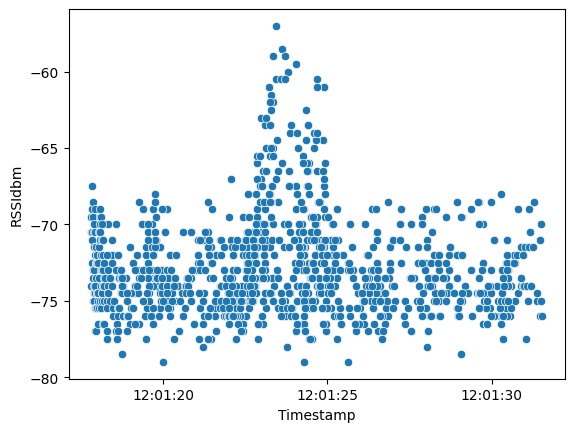

In [878]:
sns.scatterplot(data=tags, x='Timestamp', y='RSSIdbm')
#pic: le moment où l'on fait passer les tags de l'autre côté

Le pic indique le moment où l'on fait passer les tags de l'autre côté

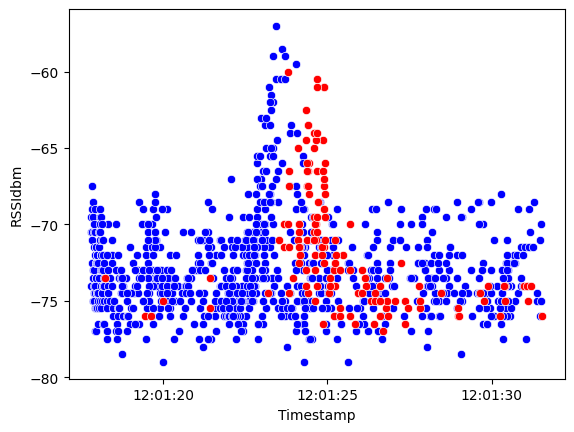

In [879]:
for Antenna_coverage,tags_k in tags.groupby('Antenna_coverage'):
  #print(k)
  #print(tags_k)
  sns.scatterplot(data=tags_k, x='Timestamp', y='RSSIdbm', color=Antenna_coverage)

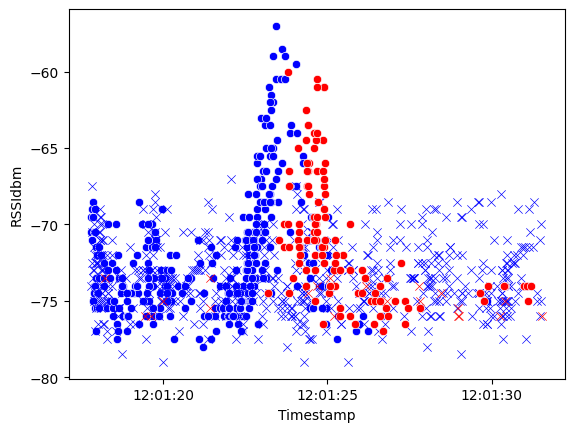

In [880]:
for key,tags_k in tags.groupby(['Antenna_coverage','actual']):
    Antenna_coverage = key[0]
    actual = key[1]
    actual_marker = {'moving':"o", 'stationary':'x'}
    marker = actual_marker[actual]
    sns.scatterplot(data=tags_k, x='Timestamp', y='RSSIdbm', color=Antenna_coverage,marker=marker)

In [881]:
tags.shape, tags.EPC.nunique()

((1040, 7), 188)

In [882]:
tags["EPC"].sample(1).values[0]

'AD3830770CCDD0AD3830036A'

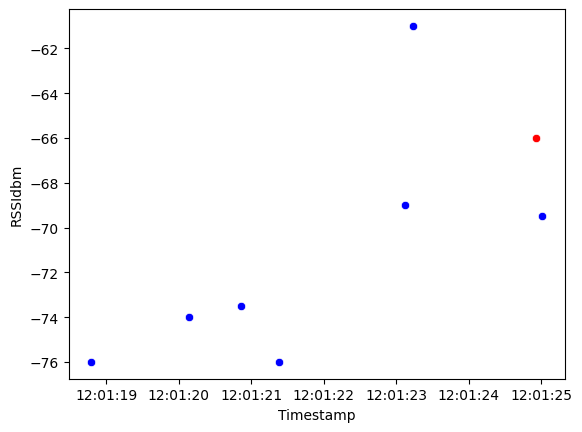

In [883]:
EPC=tags["EPC"].sample(1).values[0]
tags_epc=tags[tags["EPC"]==EPC]
rssimax = tags["RSSIdbm"].max()
rssimin = tags["RSSIdbm"].min()

for key,tags_k in tags_epc.groupby(['Antenna_coverage','actual']):
    Antenna_coverage = key[0]
    actual = key[1]
    actual_marker = {'moving':"o", 'stationary':'+'}
    marker = actual_marker[actual]
    sns.scatterplot(data=tags_k, x='Timestamp', y='RSSIdbm', color=Antenna_coverage,marker=marker)
#plt.ylim([rssimin,rssimax])

In [884]:
tags.shape
tags.groupby("EPC").size().describe()

count    188.000000
mean       5.531915
std        2.901971
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       16.000000
dtype: float64

La ligne groupe le dataframe 'tags' en utilisant la colonne 'EPC' comme clé de regroupement.

Ensuite, pour chaque groupe, elle calcule la valeur maximale de la colonne 'RSSIdbm'.

La méthode rename("RSSImax") est utilisée pour renommer la colonne résultante en 'RSSImax'.

Enfin, la méthode reset_index(drop=False) est utilisée pour réinitialiser l'index du dataframe résultant, en créant une nouvelle colonne 'index' pour conserver les anciens index.

Le dataframe résultant est assigné à la variable 'ds'.

In [885]:
ds = tags.groupby("EPC")["RSSIdbm"].max().rename("RSSImax").reset_index(drop=False)
ds = pd.merge(ds, Actuals)
ds.head()

,EPC,RSSImax,actual
0,AD3830770CCDD0AD383001BD,-76.0,stationary
1,AD3830770CCDD0AD383001BE,-73.0,stationary
2,AD3830770CCDD0AD383001BF,-73.5,stationary
3,AD3830770CCDD0AD383001C2,-75.0,stationary
4,AD3830770CCDD0AD383001C3,-61.0,moving


<Axes: xlabel='actual', ylabel='RSSImax'>

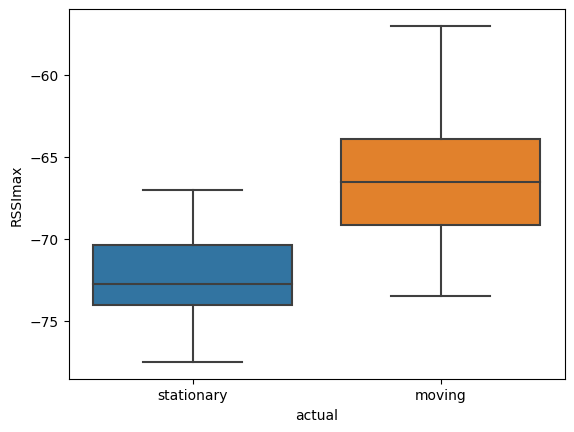

In [886]:
sns.boxplot(data=ds, x="actual", y="RSSImax")

DecisionTreeClassifier

In [887]:
from sklearn.tree import DecisionTreeClassifier

In [888]:
# Création d'un classifieur DecisionTreeClassifier avec une profondeur maximale de 1
dt = DecisionTreeClassifier(max_depth=1)

# Sélection des caractéristiques X à partir du dataframe ds
X = ds[['RSSImax']]

# Sélection de la variable cible Y à partir du dataframe ds
Y = ds['actual']

# Entraînement du modèle DecisionTreeClassifier sur les données X et Y
dt.fit(X, Y)

# Prédiction des étiquettes de classe Y à partir des données X
Ypred = dt.predict(X)

# Calcul de l'exactitude du modèle en comparant les étiquettes prédites Ypred avec les étiquettes réelles Y
accuracy = (Y == Ypred).mean()

# Affichage de la précision
accuracy


0.8138297872340425

In [889]:
threshold = dt.tree_.threshold[0]
threshold

-68.75

In [890]:
import numpy as np

threshold = -68.5
crit = ds["RSSImax"]>=threshold
print(crit)
ds["pred"] = np.where(crit, "moving", "stationary")
ds.head()

0      False
1      False
2      False
3      False
4       True
       ...  
183     True
184     True
185    False
186     True
187     True
Name: RSSImax, Length: 188, dtype: bool


,EPC,RSSImax,actual,pred
0,AD3830770CCDD0AD383001BD,-76.0,stationary,stationary
1,AD3830770CCDD0AD383001BE,-73.0,stationary,stationary
2,AD3830770CCDD0AD383001BF,-73.5,stationary,stationary
3,AD3830770CCDD0AD383001C2,-75.0,stationary,stationary
4,AD3830770CCDD0AD383001C3,-61.0,moving,moving


calculer le taux d'exactitude entre les colonnes "actual" et "pred" du dataframe "ds":

In [891]:
(ds["actual"] == ds["pred"]).mean()

0.8138297872340425

In [892]:
ds.shape

(188, 4)

Traitement des données

In [893]:
t_min=tags['Timestamp'].min()
t_max=tags['Timestamp'].max()

pd.cut(tags['Timestamp'],10)

0       (2023-03-30 12:01:17.798845184, 2023-03-30 12:...
1       (2023-03-30 12:01:19.184744192, 2023-03-30 12:...
2       (2023-03-30 12:01:21.929098752, 2023-03-30 12:...
3       (2023-03-30 12:01:23.301275904, 2023-03-30 12:...
4       (2023-03-30 12:01:24.673453056, 2023-03-30 12:...
                              ...                        
1035    (2023-03-30 12:01:23.301275904, 2023-03-30 12:...
1036    (2023-03-30 12:01:30.162161920, 2023-03-30 12:...
1037    (2023-03-30 12:01:23.301275904, 2023-03-30 12:...
1038    (2023-03-30 12:01:30.162161920, 2023-03-30 12:...
1039    (2023-03-30 12:01:30.162161920, 2023-03-30 12:...
Name: Timestamp, Length: 1040, dtype: category
Categories (10, interval[datetime64[ns, pytz.FixedOffset(120)], right]): [ <
                                                                          (2023-03-30 12:01:17.798845184, 2023-03-30 12:... <
                                                                          (2023-03-30 12:01:19.184744192, 2023-0

In [894]:
tags.sort_values('Timestamp', ascending=True).reset_index(drop=True)
#on jette lancien index
tags.head()

,EPC,Timestamp,Antenna,RSSI,RSSIdbm,actual,Antenna_coverage
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5,moving,blue
1,AD3830770CCDD0AD3830042E,2023-03-30 12:01:19.471097+02:00,1,0.070795,-71.5,moving,blue
2,AD3830770CCDD0AD3830042E,2023-03-30 12:01:22.040032+02:00,1,0.044668,-73.5,moving,blue
3,AD3830770CCDD0AD3830042E,2023-03-30 12:01:23.488428+02:00,2,0.223872,-66.5,moving,blue
4,AD3830770CCDD0AD3830042E,2023-03-30 12:01:25.124195+02:00,1,0.050119,-73.0,moving,blue


In [895]:
t_min=tags['Timestamp'].min()
t_max=tags['Timestamp'].max()

t_max

Timestamp('2023-03-30 12:01:31.534339+0200', tz='pytz.FixedOffset(120)')

In [896]:
bins= pd.date_range(t_min,t_max, freq='1s')
bins[-5:]

DatetimeIndex(['2023-03-30 12:01:26.812567+02:00',
               '2023-03-30 12:01:27.812567+02:00',
               '2023-03-30 12:01:28.812567+02:00',
               '2023-03-30 12:01:29.812567+02:00',
               '2023-03-30 12:01:30.812567+02:00'],
              dtype='datetime64[ns, pytz.FixedOffset(120)]', freq='S')

In [897]:
#pd.cut(tags['Timestamp'], np.array(bins), right=False)[:50]
#50 des chacunes premières détections ont bien été rangées

#pd.cut(tags['Timestamp'], np.array(bins), right=False)[-50:]
#les 50 dernières#bins[-5:]

tags["slot_bin"] = pd.cut(tags['Timestamp'], np.array(bins), right=False)
tags.head()

,EPC,Timestamp,Antenna,RSSI,RSSIdbm,actual,Antenna_coverage,slot_bin
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:..."
1,AD3830770CCDD0AD3830042E,2023-03-30 12:01:19.471097+02:00,1,0.070795,-71.5,moving,blue,"[2023-03-30 12:01:18.812567, 2023-03-30 12:01:..."
2,AD3830770CCDD0AD3830042E,2023-03-30 12:01:22.040032+02:00,1,0.044668,-73.5,moving,blue,"[2023-03-30 12:01:21.812567, 2023-03-30 12:01:..."
3,AD3830770CCDD0AD3830042E,2023-03-30 12:01:23.488428+02:00,2,0.223872,-66.5,moving,blue,"[2023-03-30 12:01:22.812567, 2023-03-30 12:01:..."
4,AD3830770CCDD0AD3830042E,2023-03-30 12:01:25.124195+02:00,1,0.050119,-73.0,moving,blue,"[2023-03-30 12:01:24.812567, 2023-03-30 12:01:..."


Slots

In [898]:
Slots = pd.DataFrame({'slot_bin': tags['slot_bin'].unique()})
Slots['slot_id'] = Slots.index

Slots

,slot_bin,slot_id
0,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0
1,"[2023-03-30 12:01:18.812567, 2023-03-30 12:01:...",1
2,"[2023-03-30 12:01:21.812567, 2023-03-30 12:01:...",2
3,"[2023-03-30 12:01:22.812567, 2023-03-30 12:01:...",3
4,"[2023-03-30 12:01:24.812567, 2023-03-30 12:01:...",4
5,"[2023-03-30 12:01:29.812567, 2023-03-30 12:01:...",5
6,"[2023-03-30 12:01:19.812567, 2023-03-30 12:01:...",6
7,"[2023-03-30 12:01:20.812567, 2023-03-30 12:01:...",7
8,"[2023-03-30 12:01:23.812567, 2023-03-30 12:01:...",8
9,"[2023-03-30 12:01:26.812567, 2023-03-30 12:01:...",9


In [899]:
tags = pd.merge(tags, Slots)
tags = tags.dropna()
tags.head()

,EPC,Timestamp,Antenna,RSSI,RSSIdbm,actual,Antenna_coverage,slot_bin,slot_id
0,AD3830770CCDD0AD3830042E,2023-03-30 12:01:17.812567+02:00,1,0.112202,-69.5,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0
1,AD3830770CCDD0AD3830040B,2023-03-30 12:01:17.815952+02:00,1,0.089125,-70.5,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0
2,AD3830770CCDD0AD3830040B,2023-03-30 12:01:18.312359+02:00,1,0.050119,-73.0,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0
3,AD3830770CCDD0AD3830040B,2023-03-30 12:01:18.460130+02:00,1,0.056234,-72.5,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0
4,AD3830770CCDD0AD3830040B,2023-03-30 12:01:18.580479+02:00,1,0.050119,-73.0,moving,blue,"[2023-03-30 12:01:17.812567, 2023-03-30 12:01:...",0


**GROUPBY**:
dans chacun des slots on a le nombre de détections

In [900]:
tags.groupby(['EPC', 'slot_id']).size()

EPC                       slot_id
AD3830770CCDD0AD383001BD  0          1
                          3          1
                          4          1
                          5          1
                          6          1
                                    ..
AD3830770CCDD0AD383004B2  8          1
AD3830770CCDD0AD383004B3  0          1
                          1          1
                          3          1
                          7          1
Length: 936, dtype: int64

In [901]:
tags.groupby(['EPC', 'slot_id']).size().unstack('slot_id', fill_value=0)

slot_id,0,1,2,3,4,5,6,7,8,9,10,11,12
EPC,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,1,0,0,1,1,1,1,0,2,1,1,1,1
AD3830770CCDD0AD383001BE,1,0,0,1,1,1,1,1,1,1,0,1,0
AD3830770CCDD0AD383001BF,1,0,1,1,1,1,1,0,0,1,0,1,0
AD3830770CCDD0AD383001C2,0,0,0,0,0,0,0,0,1,0,0,0,1
AD3830770CCDD0AD383001C3,1,0,0,2,2,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0,1,1,0,0,0,0,0,1,0,1,0,0
AD3830770CCDD0AD383004AF,1,0,1,0,0,0,1,0,1,1,0,0,0
AD3830770CCDD0AD383004B1,0,1,1,1,1,0,0,0,1,0,0,0,0


In [902]:
tags.groupby(['EPC', 'slot_id'])['RSSI'].max().unstack('slot_id', fill_value=0)

slot_id,0,1,2,3,4,5,6,7,8,9,10,11,12
EPC,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.017783,0.019953,0.019953,0.015849,0.014125
AD3830770CCDD0AD383001BE,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,0.000000,0.025119,0.000000
AD3830770CCDD0AD383001BF,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,0.000000,0.035481,0.000000
AD3830770CCDD0AD383001C2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,0.000000,0.000000,0.025119
AD3830770CCDD0AD383001C3,0.025119,0.000000,0.000000,0.794328,0.251189,0.000000,0.039811,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,0.035481,0.000000,0.000000
AD3830770CCDD0AD383004AF,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,0.000000,0.000000,0.000000
AD3830770CCDD0AD383004B1,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,0.000000,0.000000,0.000000


In [903]:
tags.groupby(['EPC', 'slot_id'])['RSSI'].min().unstack('slot_id', fill_value=0)

slot_id,0,1,2,3,4,5,6,7,8,9,10,11,12
EPC,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.012589,0.019953,0.019953,0.015849,0.014125
AD3830770CCDD0AD383001BE,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,0.000000,0.025119,0.000000
AD3830770CCDD0AD383001BF,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,0.000000,0.035481,0.000000
AD3830770CCDD0AD383001C2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,0.000000,0.000000,0.025119
AD3830770CCDD0AD383001C3,0.025119,0.000000,0.000000,0.125893,0.112202,0.000000,0.039811,0.025119,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,0.035481,0.000000,0.000000
AD3830770CCDD0AD383004AF,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,0.000000,0.000000,0.000000
AD3830770CCDD0AD383004B1,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,0.000000,0.000000,0.000000


In [904]:
tags.groupby(['EPC', 'slot_id'])['RSSI'].mean().unstack('slot_id', fill_value=0)

slot_id,0,1,2,3,4,5,6,7,8,9,10,11,12
EPC,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.015186,0.019953,0.019953,0.015849,0.014125
AD3830770CCDD0AD383001BE,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,0.000000,0.025119,0.000000
AD3830770CCDD0AD383001BF,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,0.000000,0.035481,0.000000
AD3830770CCDD0AD383001C2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,0.000000,0.000000,0.025119
AD3830770CCDD0AD383001C3,0.025119,0.000000,0.000000,0.460110,0.181695,0.000000,0.039811,0.034894,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,0.035481,0.000000,0.000000
AD3830770CCDD0AD383004AF,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,0.000000,0.000000,0.000000
AD3830770CCDD0AD383004B1,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,0.000000,0.000000,0.000000


In [905]:
tags.groupby(['EPC', 'slot_id'])['RSSI'].sum().unstack('slot_id', fill_value=0)

slot_id,0,1,2,3,4,5,6,7,8,9,10,11,12
EPC,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.030372,0.019953,0.019953,0.015849,0.014125
AD3830770CCDD0AD383001BE,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,0.000000,0.025119,0.000000
AD3830770CCDD0AD383001BF,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,0.000000,0.035481,0.000000
AD3830770CCDD0AD383001C2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,0.000000,0.000000,0.025119
AD3830770CCDD0AD383001C3,0.025119,0.000000,0.000000,0.920221,0.363390,0.000000,0.039811,0.069787,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,0.035481,0.000000,0.000000
AD3830770CCDD0AD383004AF,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,0.000000,0.000000,0.000000
AD3830770CCDD0AD383004B1,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,0.000000,0.000000,0.000000


**PIVOT TABLE**

outil qui permet de réorganiser et de résumer les données de manière à faciliter l'analyse et la visualisation

Création d'une table pivotante (pivot table) à partir du dataframe 'tags'

La valeur par défaut pour les cellules vides est définie à 0

Nous avons des id et EPC avec toutes leurs données. Nous voulons avoir les données des EPC sur une seule ligne

On regarde le RSSI dans chacun des slot id

3*13=39 => nous devrons obtenir en nouvelles dimensions: (188, 89)



In [906]:
ds = pd.pivot_table(tags, index='EPC', values="RSSI", columns=['slot_id'], fill_value=0, aggfunc=['max', 'min', 'count'])
ds.head()

max                                     \
slot_id                         0    1         2         3         4    
EPC                                                                     
AD3830770CCDD0AD383001BD  0.022387  0.0  0.000000  0.017783  0.022387   
AD3830770CCDD0AD383001BE  0.050119  0.0  0.000000  0.028184  0.028184   
AD3830770CCDD0AD383001BF  0.035481  0.0  0.031623  0.025119  0.044668   
AD3830770CCDD0AD383001C2  0.000000  0.0  0.000000  0.000000  0.000000   
AD3830770CCDD0AD383001C3  0.025119  0.0  0.000000  0.794328  0.251189   

                                                                            \
slot_id                         5         6         7         8         9    
EPC                                                                          
AD3830770CCDD0AD383001BD  0.025119  0.012589  0.000000  0.017783  0.019953   
AD3830770CCDD0AD383001BE  0.025119  0.031623  0.039811  0.019953  0.025119   
AD3830770CCDD0AD383001BF  0.031623  0.044668  0.000000  0.000000  0.031623   
AD3830770CCDD0AD383001C2  0.000000  0.000000  0.000000  0.031623  0.000000   
AD3830770CCDD0AD383001C3  0.000000  0.039811  0.044668  0.000000  0.000000   

                          ... count                             
slot_id                   ...    3  4  5  6  7  8  9  10 11 12  
EPC                       ...                                   
AD3830770CCDD0AD383001BD  ...     1  1  1  1  0  2  1  1  1  1  
AD3830770CCDD0AD383001BE  ...     1  1  1  1  1  1  1  0  1  0  
AD3830770CCDD0AD383001BF  ...     1  1  1  1  0  0  1  0  1  0  
AD3830770CCDD0AD383001C2  ...     0  0  0  0  0  1  0  0  0  1  
AD3830770CCDD0AD383001C3  ...     2  2  0  1  2  0  0  0  0  0  

[5 rows x 39 columns]

In [907]:
ds.shape  #nous avons bien la nouvelle dimension (188, 39)

(188, 39)

In [908]:
ds.columns

MultiIndex([(  'max',  0),
            (  'max',  1),
            (  'max',  2),
            (  'max',  3),
            (  'max',  4),
            (  'max',  5),
            (  'max',  6),
            (  'max',  7),
            (  'max',  8),
            (  'max',  9),
            (  'max', 10),
            (  'max', 11),
            (  'max', 12),
            (  'min',  0),
            (  'min',  1),
            (  'min',  2),
            (  'min',  3),
            (  'min',  4),
            (  'min',  5),
            (  'min',  6),
            (  'min',  7),
            (  'min',  8),
            (  'min',  9),
            (  'min', 10),
            (  'min', 11),
            (  'min', 12),
            ('count',  0),
            ('count',  1),
            ('count',  2),
            ('count',  3),
            ('count',  4),
            ('count',  5),
            ('count',  6),
            ('count',  7),
            ('count',  8),
            ('count',  9),
            ('count', 10),
 

In [909]:
Cols = ["_".join([str(y) for y in x]) for x in ds.columns]

In [910]:
ds.columns = Cols
ds

,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,max_9,...,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12
EPC,,,,,,,,,,,,,,,,,,,,,
AD3830770CCDD0AD383001BD,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.017783,0.019953,...,1,1,1,1,0,2,1,1,1,1
AD3830770CCDD0AD383001BE,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,...,1,1,1,1,1,1,1,0,1,0
AD3830770CCDD0AD383001BF,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,...,1,1,1,1,0,0,1,0,1,0
AD3830770CCDD0AD383001C2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,...,0,0,0,0,0,1,0,0,0,1
AD3830770CCDD0AD383001C3,0.025119,0.000000,0.000000,0.794328,0.251189,0.000000,0.039811,0.044668,0.000000,0.000000,...,2,2,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AD3830770CCDD0AD383004AA,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,...,0,0,0,0,0,1,0,1,0,0
AD3830770CCDD0AD383004AF,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,...,0,0,0,1,0,1,1,0,0,0
AD3830770CCDD0AD383004B1,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,...,1,1,0,0,0,1,0,0,0,0


In [911]:
ds = ds.reset_index(drop=False)
ds.head()

,EPC,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,...,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12
0,AD3830770CCDD0AD383001BD,0.022387,0.0,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.017783,...,1,1,1,1,0,2,1,1,1,1
1,AD3830770CCDD0AD383001BE,0.050119,0.0,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,...,1,1,1,1,1,1,1,0,1,0
2,AD3830770CCDD0AD383001BF,0.035481,0.0,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,...,1,1,1,1,0,0,1,0,1,0
3,AD3830770CCDD0AD383001C2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,...,0,0,0,0,0,1,0,0,0,1
4,AD3830770CCDD0AD383001C3,0.025119,0.0,0.000000,0.794328,0.251189,0.000000,0.039811,0.044668,0.000000,...,2,2,0,1,2,0,0,0,0,0


Shape du ds

In [912]:
ds.shape

(188, 40)

In [913]:
ds = pd.merge(ds, Actuals)

In [914]:
X = ds.loc[:,Cols]
y = ds.loc[:,'actual']

In [915]:
X

,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,max_9,...,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12
0,0.022387,0.000000,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.017783,0.019953,...,1,1,1,1,0,2,1,1,1,1
1,0.050119,0.000000,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,0.025119,...,1,1,1,1,1,1,1,0,1,0
2,0.035481,0.000000,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,0.031623,...,1,1,1,1,0,0,1,0,1,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,0.025119,0.000000,0.000000,0.794328,0.251189,0.000000,0.039811,0.044668,0.000000,0.000000,...,2,2,0,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.000000,0.022387,0.044668,0.000000,0.000000,0.000000,0.000000,0.000000,0.251189,0.000000,...,0,0,0,0,0,1,0,1,0,0
184,0.070795,0.000000,0.050119,0.000000,0.000000,0.000000,0.039811,0.000000,0.354813,0.031623,...,0,0,0,1,0,1,1,0,0,0
185,0.000000,0.031623,0.031623,0.070795,0.056234,0.000000,0.000000,0.000000,0.112202,0.000000,...,1,1,0,0,0,1,0,0,0,0
186,0.000000,0.000000,0.000000,0.089125,0.000000,0.000000,0.000000,0.000000,0.223872,0.000000,...,1,0,0,0,0,1,0,0,0,0


In [916]:
ds.head()

,EPC,max_0,max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8,...,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12,actual
0,AD3830770CCDD0AD383001BD,0.022387,0.0,0.000000,0.017783,0.022387,0.025119,0.012589,0.000000,0.017783,...,1,1,1,0,2,1,1,1,1,stationary
1,AD3830770CCDD0AD383001BE,0.050119,0.0,0.000000,0.028184,0.028184,0.025119,0.031623,0.039811,0.019953,...,1,1,1,1,1,1,0,1,0,stationary
2,AD3830770CCDD0AD383001BF,0.035481,0.0,0.031623,0.025119,0.044668,0.031623,0.044668,0.000000,0.000000,...,1,1,1,0,0,1,0,1,0,stationary
3,AD3830770CCDD0AD383001C2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031623,...,0,0,0,0,1,0,0,0,1,stationary
4,AD3830770CCDD0AD383001C3,0.025119,0.0,0.000000,0.794328,0.251189,0.000000,0.039811,0.044668,0.000000,...,2,0,1,2,0,0,0,0,0,moving


Partie Machine Learning et prédiction

In [917]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [918]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

FICHIER  KO

In [919]:
cols = ["Timestamp", "EPC", "TID", "Antenna", "RSSI", "Frequency", "Hostname", "PhaseAngle", "DopplerFrequency"]
tags = pd.read_csv('/content/drive/MyDrive/ESEO_S7_S8/RFID_7_juin/lesCsv/ko=2__05-31-2023_12h_07m_31s.csv', sep=';', names = cols, skiprows = 3)
tags = tags.drop(columns=['TID','PhaseAngle','DopplerFrequency','Hostname'])
tags.head()

,Timestamp,EPC,Antenna,RSSI,Frequency
0,#2023-05-31T12:07:41.2163356+02:00 GPI Event P...,NaN,NaN,NaN,NaN
1,#2023-05-31T12:07:41.2163656+02:00 GPI Event P...,NaN,NaN,NaN,NaN
2,#2023-05-31T12:07:41.2163843+02:00 GPI Event P...,NaN,NaN,NaN,NaN
3,#2023-05-31T12:07:41.2164010+02:00 GPI Event P...,NaN,NaN,NaN,NaN
4,#2023-05-31T12:07:41.2758104+02:00 GPI Event P...,NaN,NaN,NaN,NaN


In [920]:
laser = tags[tags["Timestamp"].str.startswith("#")]
laser = laser["Timestamp"]
laser.head()
date_laser = pd.to_datetime([x.split(" ")[-1] for x in laser])
etat_laser = [x.split(" ")[-3] for x in laser]

data_laser = pd.DataFrame({'Timestamp': date_laser})
data_laser['status'] = etat_laser

print(data_laser.shape)
data_laser
import time 
data_laser["crossing_id"]  = ((data_laser["Timestamp"] - data_laser["Timestamp"].shift(1) ).dt.total_seconds() >1.0).cumsum()
data_laser.head()

(40, 2)


,Timestamp,status,crossing_id
0,2023-05-31 12:07:41.216231400+02:00,low,0
1,2023-05-31 12:07:41.216352700+02:00,low,0
2,2023-05-31 12:07:41.216374+02:00,low,0
3,2023-05-31 12:07:41.216392200+02:00,low,0
4,2023-05-31 12:07:41.275523700+02:00,high,0


In [921]:
data_laser = data_laser[data_laser['crossing_id']!=0]
data_laser

,Timestamp,status,crossing_id
8,2023-05-31 12:07:49.047039600+02:00,low,1
9,2023-05-31 12:07:49.047084800+02:00,low,1
10,2023-05-31 12:07:49.047106100+02:00,low,1
11,2023-05-31 12:07:49.047118700+02:00,low,1
12,2023-05-31 12:07:49.746542600+02:00,high,1
13,2023-05-31 12:07:49.746565+02:00,high,1
14,2023-05-31 12:07:49.746583300+02:00,high,1
15,2023-05-31 12:07:49.746625800+02:00,high,1
16,2023-05-31 12:07:57.885936500+02:00,low,2
17,2023-05-31 12:07:57.886078700+02:00,low,2


In [922]:
data_min = data_laser.groupby("crossing_id").apply(lambda x : x["Timestamp"].min()).rename("min")
print(data_min)

data_max = data_laser.groupby("crossing_id").apply(lambda x : x["Timestamp"].max()).rename("max")
print(data_max)

df_laser = pd.concat([data_min,data_max],axis = 1)
df_laser


crossing_id
1   2023-05-31 12:07:49.047039600+02:00
2   2023-05-31 12:07:57.885936500+02:00
3   2023-05-31 12:08:07.246013100+02:00
4   2023-05-31 12:08:17.046875300+02:00
Name: min, dtype: datetime64[ns, pytz.FixedOffset(120)]
crossing_id
1   2023-05-31 12:07:49.746625800+02:00
2   2023-05-31 12:07:58.292554300+02:00
3   2023-05-31 12:08:07.645820200+02:00
4   2023-05-31 12:08:17.286619400+02:00
Name: max, dtype: datetime64[ns, pytz.FixedOffset(120)]


,min,max
crossing_id,,
1,2023-05-31 12:07:49.047039600+02:00,2023-05-31 12:07:49.746625800+02:00
2,2023-05-31 12:07:57.885936500+02:00,2023-05-31 12:07:58.292554300+02:00
3,2023-05-31 12:08:07.246013100+02:00,2023-05-31 12:08:07.645820200+02:00
4,2023-05-31 12:08:17.046875300+02:00,2023-05-31 12:08:17.286619400+02:00


In [923]:
df_laser['CrossingTime']=(df_laser["max"]-df_laser["min"])*0.5 + df_laser["min"]
df_laser = df_laser.reset_index(drop=False)[['crossing_id','CrossingTime']]

df_laser

,crossing_id,CrossingTime
0,1,2023-05-31 12:07:49.396832700+02:00
1,2,2023-05-31 12:07:58.089245400+02:00
2,3,2023-05-31 12:08:07.445916650+02:00
3,4,2023-05-31 12:08:17.166747350+02:00


In [924]:
df_rfid = tags[tags["Timestamp"].str[0] != '#']
df_rfid['Timestamp'] = pd.to_datetime(df_rfid['Timestamp'])
# Remplacement des virgules par des points dans les colonnes numériques de 'df_rfid'
df_rfid['RSSI'] = df_rfid['RSSI'].str.replace(',', '.').astype(float)
df_rfid.head()

<ipython-input-924-d1e5091ec458>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfid['Timestamp'] = pd.to_datetime(df_rfid['Timestamp'])
<ipython-input-924-d1e5091ec458>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfid['RSSI'] = df_rfid['RSSI'].str.replace(',', '.').astype(float)


,Timestamp,EPC,Antenna,RSSI,Frequency
8,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7"
9,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7"
10,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7"
11,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7"
12,2023-05-31 12:07:41.264919+02:00,AD3830770CCDD0AD38300262,1.0,-72.0,"865,7"


In [925]:
tmin = df_rfid['Timestamp'].min()
tmax = df_rfid['Timestamp'].max()

Slots = pd.DataFrame({'slotStart' : pd.date_range(tmin, tmax, freq = '1s')})
Slots['slot_id'] = Slots.index
Slots

,slotStart,slot_id
0,2023-05-31 12:07:41.258903+02:00,0
1,2023-05-31 12:07:42.258903+02:00,1
2,2023-05-31 12:07:43.258903+02:00,2
3,2023-05-31 12:07:44.258903+02:00,3
4,2023-05-31 12:07:45.258903+02:00,4
5,2023-05-31 12:07:46.258903+02:00,5
6,2023-05-31 12:07:47.258903+02:00,6
7,2023-05-31 12:07:48.258903+02:00,7
8,2023-05-31 12:07:49.258903+02:00,8
9,2023-05-31 12:07:50.258903+02:00,9


In [926]:
df_laser = pd.merge_asof(df_laser,Slots, left_on = 'CrossingTime', right_on ='slotStart', direction = 'nearest')

In [927]:
df_laser = df_laser.rename(columns={'slot_id' : 'slot_crossing'})
df_laser

,crossing_id,CrossingTime,slotStart,slot_crossing
0,1,2023-05-31 12:07:49.396832700+02:00,2023-05-31 12:07:49.258903+02:00,8
1,2,2023-05-31 12:07:58.089245400+02:00,2023-05-31 12:07:58.258903+02:00,17
2,3,2023-05-31 12:08:07.445916650+02:00,2023-05-31 12:08:07.258903+02:00,26
3,4,2023-05-31 12:08:17.166747350+02:00,2023-05-31 12:08:17.258903+02:00,36


In [928]:
df_laser = df_laser[['crossing_id','CrossingTime','slot_crossing']]
df_laser

,crossing_id,CrossingTime,slot_crossing
0,1,2023-05-31 12:07:49.396832700+02:00,8
1,2,2023-05-31 12:07:58.089245400+02:00,17
2,3,2023-05-31 12:08:07.445916650+02:00,26
3,4,2023-05-31 12:08:17.166747350+02:00,36


In [929]:
Slots = pd.merge_asof(Slots,df_laser, left_on = 'slotStart', right_on ='CrossingTime', direction = 'nearest')
Slots

,slotStart,slot_id,crossing_id,CrossingTime,slot_crossing
0,2023-05-31 12:07:41.258903+02:00,0,1,2023-05-31 12:07:49.396832700+02:00,8
1,2023-05-31 12:07:42.258903+02:00,1,1,2023-05-31 12:07:49.396832700+02:00,8
2,2023-05-31 12:07:43.258903+02:00,2,1,2023-05-31 12:07:49.396832700+02:00,8
3,2023-05-31 12:07:44.258903+02:00,3,1,2023-05-31 12:07:49.396832700+02:00,8
4,2023-05-31 12:07:45.258903+02:00,4,1,2023-05-31 12:07:49.396832700+02:00,8
5,2023-05-31 12:07:46.258903+02:00,5,1,2023-05-31 12:07:49.396832700+02:00,8
6,2023-05-31 12:07:47.258903+02:00,6,1,2023-05-31 12:07:49.396832700+02:00,8
7,2023-05-31 12:07:48.258903+02:00,7,1,2023-05-31 12:07:49.396832700+02:00,8
8,2023-05-31 12:07:49.258903+02:00,8,1,2023-05-31 12:07:49.396832700+02:00,8
9,2023-05-31 12:07:50.258903+02:00,9,1,2023-05-31 12:07:49.396832700+02:00,8


In [930]:
Slots['slot_norm']=Slots['slot_id']-Slots['slot_crossing']
Slots

,slotStart,slot_id,crossing_id,CrossingTime,slot_crossing,slot_norm
0,2023-05-31 12:07:41.258903+02:00,0,1,2023-05-31 12:07:49.396832700+02:00,8,-8
1,2023-05-31 12:07:42.258903+02:00,1,1,2023-05-31 12:07:49.396832700+02:00,8,-7
2,2023-05-31 12:07:43.258903+02:00,2,1,2023-05-31 12:07:49.396832700+02:00,8,-6
3,2023-05-31 12:07:44.258903+02:00,3,1,2023-05-31 12:07:49.396832700+02:00,8,-5
4,2023-05-31 12:07:45.258903+02:00,4,1,2023-05-31 12:07:49.396832700+02:00,8,-4
5,2023-05-31 12:07:46.258903+02:00,5,1,2023-05-31 12:07:49.396832700+02:00,8,-3
6,2023-05-31 12:07:47.258903+02:00,6,1,2023-05-31 12:07:49.396832700+02:00,8,-2
7,2023-05-31 12:07:48.258903+02:00,7,1,2023-05-31 12:07:49.396832700+02:00,8,-1
8,2023-05-31 12:07:49.258903+02:00,8,1,2023-05-31 12:07:49.396832700+02:00,8,0
9,2023-05-31 12:07:50.258903+02:00,9,1,2023-05-31 12:07:49.396832700+02:00,8,1


In [931]:
Slots=Slots[Slots['crossing_id']!=1]
Slots

,slotStart,slot_id,crossing_id,CrossingTime,slot_crossing,slot_norm
13,2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4
14,2023-05-31 12:07:55.258903+02:00,14,2,2023-05-31 12:07:58.089245400+02:00,17,-3
15,2023-05-31 12:07:56.258903+02:00,15,2,2023-05-31 12:07:58.089245400+02:00,17,-2
16,2023-05-31 12:07:57.258903+02:00,16,2,2023-05-31 12:07:58.089245400+02:00,17,-1
17,2023-05-31 12:07:58.258903+02:00,17,2,2023-05-31 12:07:58.089245400+02:00,17,0
18,2023-05-31 12:07:59.258903+02:00,18,2,2023-05-31 12:07:58.089245400+02:00,17,1
19,2023-05-31 12:08:00.258903+02:00,19,2,2023-05-31 12:07:58.089245400+02:00,17,2
20,2023-05-31 12:08:01.258903+02:00,20,2,2023-05-31 12:07:58.089245400+02:00,17,3
21,2023-05-31 12:08:02.258903+02:00,21,2,2023-05-31 12:07:58.089245400+02:00,17,4
22,2023-05-31 12:08:03.258903+02:00,22,3,2023-05-31 12:08:07.445916650+02:00,26,-4


In [932]:
df_rfid = pd.merge_asof(df_rfid, Slots, left_on='Timestamp', right_on='slotStart', direction='nearest')
df_rfid.head()

,Timestamp,EPC,Antenna,RSSI,Frequency,slotStart,slot_id,crossing_id,CrossingTime,slot_crossing,slot_norm
0,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7",2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4
1,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7",2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4
2,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7",2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4
3,2023-05-31 12:07:41.258903+02:00,AD3830770CCDD0AD3830027D,1.0,-73.0,"865,7",2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4
4,2023-05-31 12:07:41.264919+02:00,AD3830770CCDD0AD38300262,1.0,-72.0,"865,7",2023-05-31 12:07:54.258903+02:00,13,2,2023-05-31 12:07:58.089245400+02:00,17,-4


In [933]:
ds2=pd.pivot_table(df_rfid, index=['EPC', 'crossing_id'], values="RSSI", columns=['slot_norm'], fill_value=0, aggfunc=['max', 'min', 'count'])
ds2 = ds2.reset_index(drop=False)
ds2.head()

EPC crossing_id   max                          \
slot_norm                                          -4    -3    -2    -1     0   
0          0C0000000000000000000010           2 -66.0 -70.5   0.0 -70.0 -70.5   
1          0C0000000000000000000010           3 -70.5 -70.5 -70.5 -71.0 -70.5   
2          0C0000000000000000000010           4 -70.5 -70.0 -70.5 -70.0 -67.0   
3          3035307B2831B383E07F5B90           2   0.0   0.0   0.0   0.0   0.0   
4          AD3830770CCDD0AD383001BE           2 -76.5   0.0   0.0 -76.0   0.0   

                             ... count                                
slot_norm     1     2     3  ...    -3 -2 -1   0   1   2  3  4  5  6  
0         -70.5 -70.5 -71.0  ...     8  0  8   8   8   8  8  8  0  0  
1         -71.0 -70.0 -70.5  ...     8  8  8   4  12   8  8  8  8  0  
2         -70.0 -70.5   0.0  ...     8  4  8  16  12  12  0  8  8  8  
3           0.0 -72.0   0.0  ...     0  0  0   0   0   4  0  0  0  0  
4           0.0   0.0   0.0  ...     0  0  4   0   0   0  0  0  0  0  

[5 rows x 35 columns]

In [934]:
Cols = ["".join([str(y) for y in x]) for x in ds2.columns]
ds2.columns = Cols
ds2.head()

,EPC,crossing_id,max-4,max-3,max-2,max-1,max0,max1,max2,max3,...,count-3,count-2,count-1,count0,count1,count2,count3,count4,count5,count6
0,0C0000000000000000000010,2,-66.0,-70.5,0.0,-70.0,-70.5,-70.5,-70.5,-71.0,...,8,0,8,8,8,8,8,8,0,0
1,0C0000000000000000000010,3,-70.5,-70.5,-70.5,-71.0,-70.5,-71.0,-70.0,-70.5,...,8,8,8,4,12,8,8,8,8,0
2,0C0000000000000000000010,4,-70.5,-70.0,-70.5,-70.0,-67.0,-70.0,-70.5,0.0,...,8,4,8,16,12,12,0,8,8,8
3,3035307B2831B383E07F5B90,2,0.0,0.0,0.0,0.0,0.0,0.0,-72.0,0.0,...,0,0,0,0,0,4,0,0,0,0
4,AD3830770CCDD0AD383001BE,2,-76.5,0.0,0.0,-76.0,0.0,0.0,0.0,0.0,...,0,0,4,0,0,0,0,0,0,0


In [935]:
Actuals.head()

,EPC,actual
0,AD3830770CCDD0AD3830024F,moving
1,AD3830770CCDD0AD383004AF,moving
2,AD3830770CCDD0AD38300220,moving
3,AD3830770CCDD0AD3830021D,moving
4,AD3830770CCDD0AD38300275,moving


In [936]:
ds2 = pd.merge(ds2,Actuals)

In [937]:
Cols

['EPC',
 'crossing_id',
 'max-4',
 'max-3',
 'max-2',
 'max-1',
 'max0',
 'max1',
 'max2',
 'max3',
 'max4',
 'max5',
 'max6',
 'min-4',
 'min-3',
 'min-2',
 'min-1',
 'min0',
 'min1',
 'min2',
 'min3',
 'min4',
 'min5',
 'min6',
 'count-4',
 'count-3',
 'count-2',
 'count-1',
 'count0',
 'count1',
 'count2',
 'count3',
 'count4',
 'count5',
 'count6']

In [938]:
X = ds2.loc[:,Cols]
y = ds2.loc[:,'actual']

In [939]:
X = X.drop(columns='EPC')

In [940]:
ds2.head()

,EPC,crossing_id,max-4,max-3,max-2,max-1,max0,max1,max2,max3,...,count-2,count-1,count0,count1,count2,count3,count4,count5,count6,actual
0,AD3830770CCDD0AD383001BE,2,-76.5,0.0,0.0,-76.0,0.0,0.0,0.0,0.0,...,0,4,0,0,0,0,0,0,0,stationary
1,AD3830770CCDD0AD383001BE,3,0.0,0.0,0.0,0.0,0.0,0.0,-76.5,-77.0,...,0,0,0,0,4,4,8,4,0,stationary
2,AD3830770CCDD0AD383001BE,4,-76.5,-76.5,-76.5,-76.0,0.0,0.0,0.0,0.0,...,4,4,0,0,0,0,0,0,0,stationary
3,AD3830770CCDD0AD383001BF,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-75.0,...,0,0,0,0,0,8,0,0,0,stationary
4,AD3830770CCDD0AD383001C3,2,-58.5,-74.0,0.0,-69.0,-72.5,-64.5,0.0,-74.0,...,0,4,4,12,0,4,0,0,0,moving


CLASSIFIER  REGRESSION

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

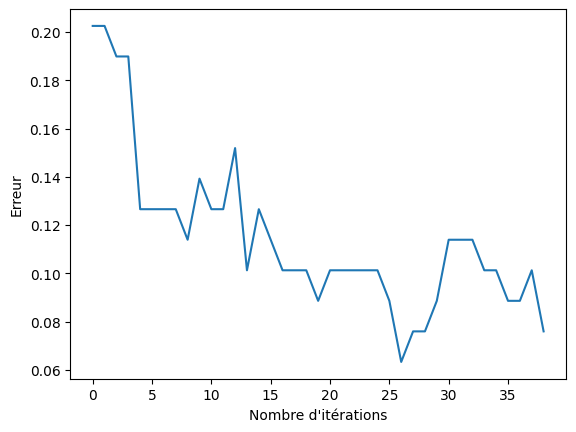

In [941]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialisation de la liste d'erreurs
list_erreur = []

for i in range(1, 40):
    # Création et ajustement du modèle LogisticRegression
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    # Calcul de l'erreur et ajout à la liste d'erreurs
    erreur = 1 - model.score(X_test, y_test)
    list_erreur.append(erreur)

# Affichage de la courbe d'erreur
plt.plot(list_erreur)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Erreur')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

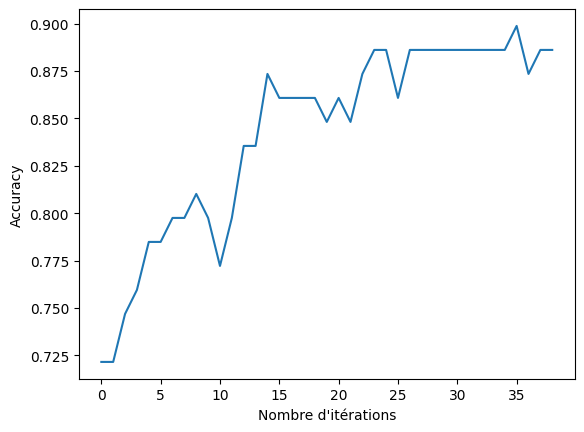

In [942]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialisation de la liste des accuracies
list_accuracy = []

for i in range(1, 40):
    # Création et ajustement du modèle LogisticRegression
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy et ajout à la liste des accuracies
    accuracy = model.score(X_test, y_test)
    list_accuracy.append(accuracy)

# Affichage de la courbe d'accuracy
plt.plot(list_accuracy)
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Accuracy')
plt.show()


In [943]:
print(list_accuracy)

[0.7215189873417721, 0.7215189873417721, 0.7468354430379747, 0.759493670886076, 0.7848101265822784, 0.7848101265822784, 0.7974683544303798, 0.7974683544303798, 0.810126582278481, 0.7974683544303798, 0.7721518987341772, 0.7974683544303798, 0.8354430379746836, 0.8354430379746836, 0.8734177215189873, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8481012658227848, 0.8607594936708861, 0.8481012658227848, 0.8734177215189873, 0.8860759493670886, 0.8860759493670886, 0.8607594936708861, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8860759493670886, 0.8987341772151899, 0.8734177215189873, 0.8860759493670886, 0.8860759493670886]


Matrice de confusion

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


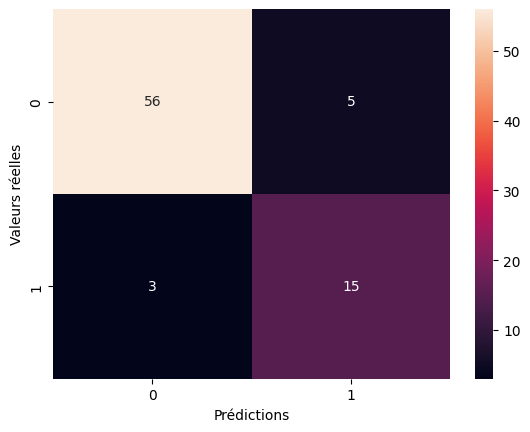

In [944]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et ajustement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# Affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.show()
